In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

# Install

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xj9mdUSEdmfucykGs5n4")
project = rf.workspace("imacs-pothole-detection-wo8mu").project("pothole-detection-irkz9")
dataset = project.version(4).download("yolov7")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 996.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=f43fd8a16de1f7769331d494cce8f8c193091f0ac321fa4dc71b81b535f0d21e
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypar

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Pothole-Detection-4 in yolov7pytorch:: 100%|██████████| 192/192 [00:00<00:00, 3166.57it/s]


# Look at Some Images

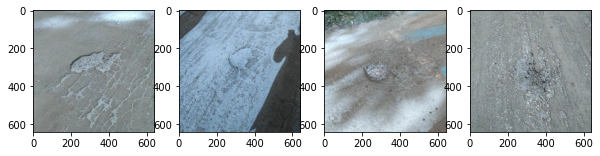

In [3]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("/content/Pothole-Detection-4/train/images/img_0001_jpg.rf.a1b2cbb215020baa3ecc4620e2dc8bdb.jpg")
ax[0].imshow(image)
image = cv.imread("/content/Pothole-Detection-4/train/images/img_0002_jpg.rf.a60be0f33dfe24833b66f74059763512.jpg")
ax[1].imshow(image)
image = cv.imread("/content/Pothole-Detection-4/train/images/img_0004_jpg.rf.513a3a4a0c8498d4cc069fdd11e2c49e.jpg")
ax[2].imshow(image)
image = cv.imread("/content/Pothole-Detection-4/train/images/img_0005_jpg.rf.04ce9ec4eadc45f0dbcf5e660c6bacfd.jpg")
ax[3].imshow(image)
fig.show()

# Create the File System

In [4]:
%cd ../tmp

/tmp


# Download YoloV7

In [5]:
# Download YOLOv7
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov7'...
remote: Enumerating objects: 1127, done.
remote: Total 1127 (delta 0), reused 0 (delta 0), pack-reused 1127
Receiving objects: 100% (1127/1127), 69.93 MiB | 16.33 MiB/s, done.
Resolving deltas: 100% (525/525), done.
/tmp/yolov7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.0 MB/s eta 0:00:00
/tmp
Setup complete. Using torch 1.13.1+cu116 (Tesla T4)


# New YAML file

Create new Yaml file to fit the file system. 

In [6]:
%cp -r /content/Pothole-Detection-4 /tmp

In [7]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '/content/Pothole-Detection-4/train',
    val = '/content/Pothole-Detection-4/valid',
    nc = 1,
    names = ['Tire']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [8]:
%cd yolov7

/tmp/yolov7


# Train the YoloV7 Model

In [9]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data ../data.yaml  --weights 'yolov7.pt'

/bin/bash: wandb: command not found
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='../data.yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warm

# Look at Training Results

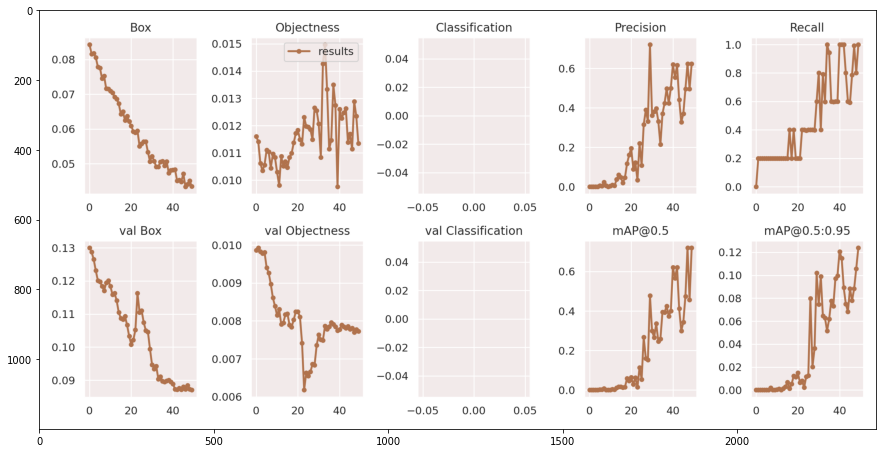

In [10]:
img = cv.imread("runs/train/exp/results.png")
plt.figure(figsize=(15, 15))
plt.imshow(img)

# Model Validation Output

Let's look at how the model performed on a validation batch

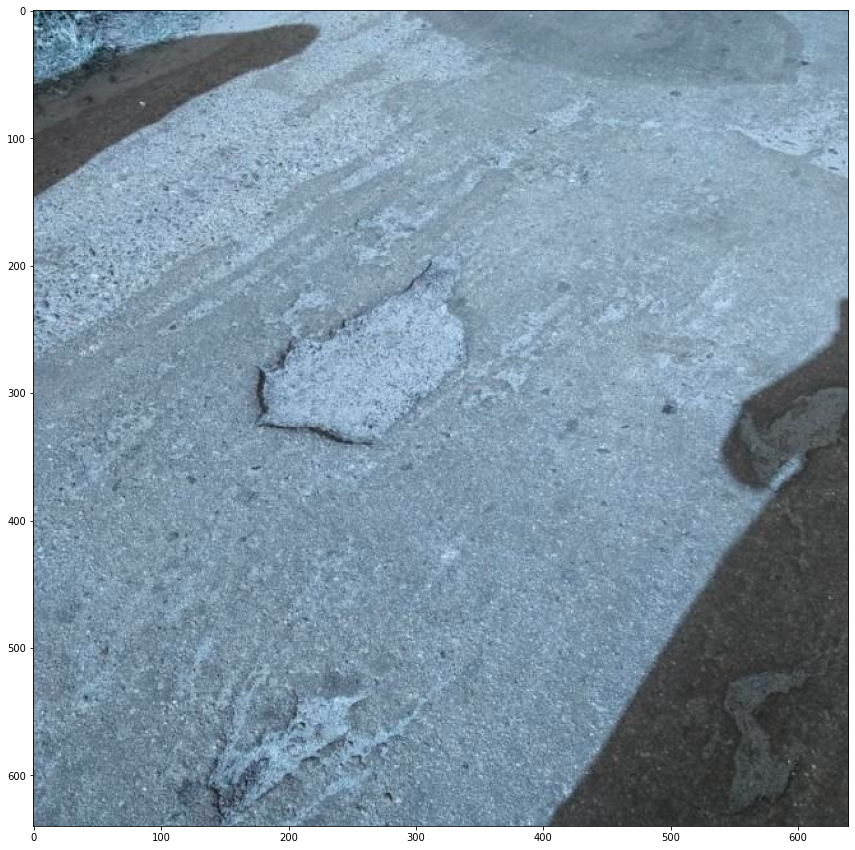

In [19]:
img = cv.imread("runs/detect/exp2/img_0023_jpg.rf.45784ae212116117aa32d18c8b77aa4a.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

# Test the model

This will test the model we have created against an image it has not seen previously.

In [16]:
!python detect.py --source /content/Pothole-Detection-4/test/images/img_0023_jpg.rf.45784ae212116117aa32d18c8b77aa4a.jpg --weights runs/train/exp/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/Pothole-Detection-4/test/images/img_0023_jpg.rf.45784ae212116117aa32d18c8b77aa4a.jpg', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-mod

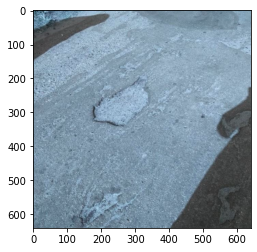

In [17]:
img = cv.imread("runs/detect/exp2/img_0023_jpg.rf.45784ae212116117aa32d18c8b77aa4a.jpg")
plt.imshow(img)

In [20]:
!python detect.py --source /content/sections.mov --weights runs/train/exp/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/sections.mov', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/38

In [32]:
!ls /tmp/yolov7/runs/detect/

exp  exp2  exp3


In [34]:
!ls /tmp/yolov7/runs/detect/exp3

sections.mov


In [35]:
from google.colab import files
files.download("/tmp/yolov7/runs/detect/exp3")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>